# CM2604: Machine Learning
### Individual Coursework

### Collect Dataset

In [1]:
# Install the ucimlrepo package
!pip install ucimlrepo

In [2]:
# Import the dataset into your code
from ucimlrepo import fetch_ucirepo

# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets

# metadata
print(bank_marketing.metadata)

# variable information
print(bank_marketing.variables)

{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'ID': 277, 'type': 'NATIVE', 'title': 'A data-driven approach to predict the s

In [3]:
df = bank_marketing.data.original

In [4]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn import metrics
from sklearn.metrics import f1_score,confusion_matrix, mean_squared_error, mean_absolute_error, classification_report, roc_auc_score, roc_curve, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [5]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN,no


### Data EDA and preprocessing

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
 16  y            45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
df.describe()

,age,balance,day_of_week,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
df=df.drop(['duration'], axis=1)

In [9]:
# Check for duplicate rows.
print(f"There are {df.duplicated().sum()} duplicate rows in the data set.")

# Remove duplicate rows.
df=df.drop_duplicates()
print("The duplicate rows were removed.")

There are 16 duplicate rows in the data set.
The duplicate rows were removed.


In [10]:
df['job'] = df['job'].fillna('unknown')
df['education'] = df['education'].fillna('unknown')
df['poutcome'] = df['poutcome'].fillna('unknown')
df['contact'] = df['contact'].fillna('unknown')

<ipython-input-10-ff88b65ee3e5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['job'] = df['job'].fillna('unknown')
<ipython-input-10-ff88b65ee3e5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['education'] = df['education'].fillna('unknown')
<ipython-input-10-ff88b65ee3e5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

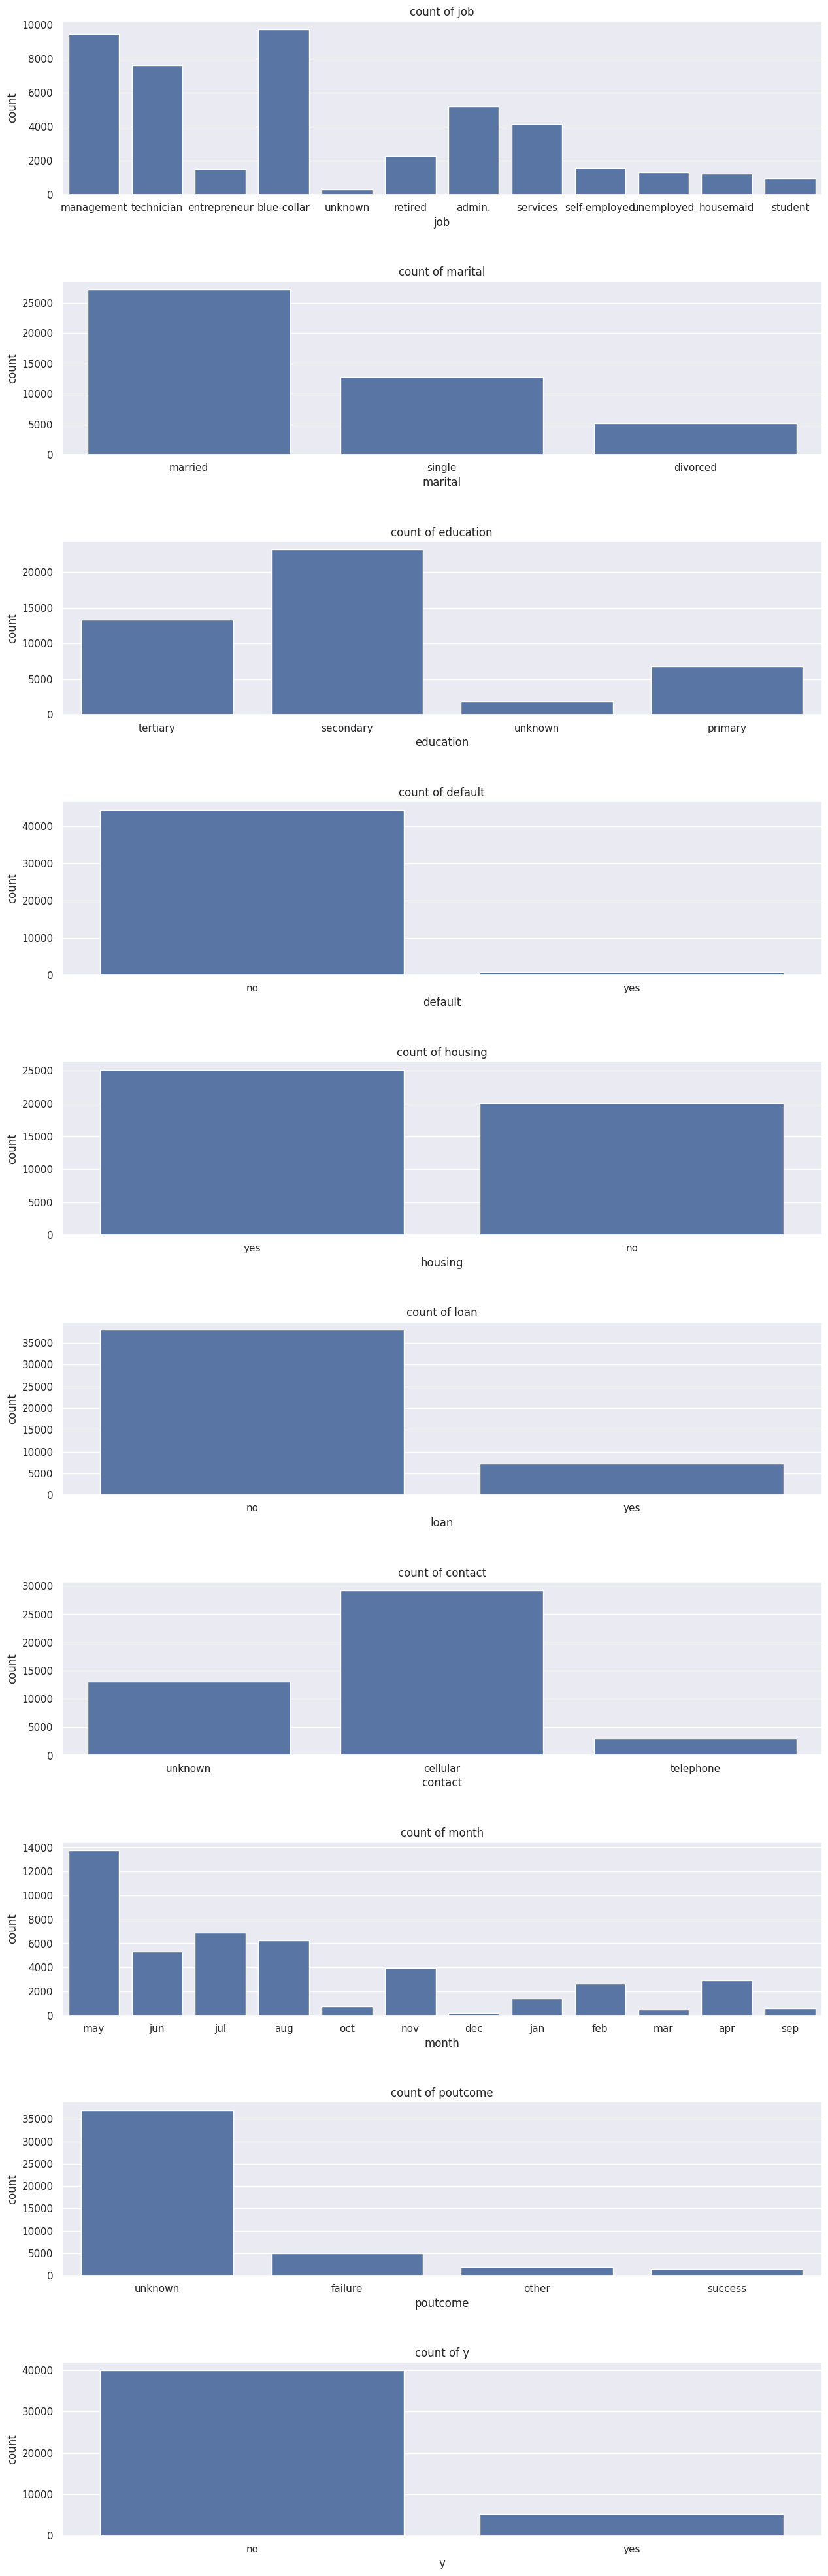

In [11]:
# Countplot for categorical columns
cat_col = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

sns.set_theme()
fig, ax = plt.subplots(nrows=10, ncols=1, figsize=(15, 50))
fig.subplots_adjust(hspace=.5)
plt.title('Countplot for categorical variables')

for i, col in enumerate(cat_col):
    sns.countplot(x=col, data=df, ax=ax[i])
    ax[i].set_title('count of {}'.format(col))

In [12]:
# Check for null values.
print(f"There are {df.isna().any().sum()} cells with null values in the data set.")

There are 0 cells with null values in the data set.


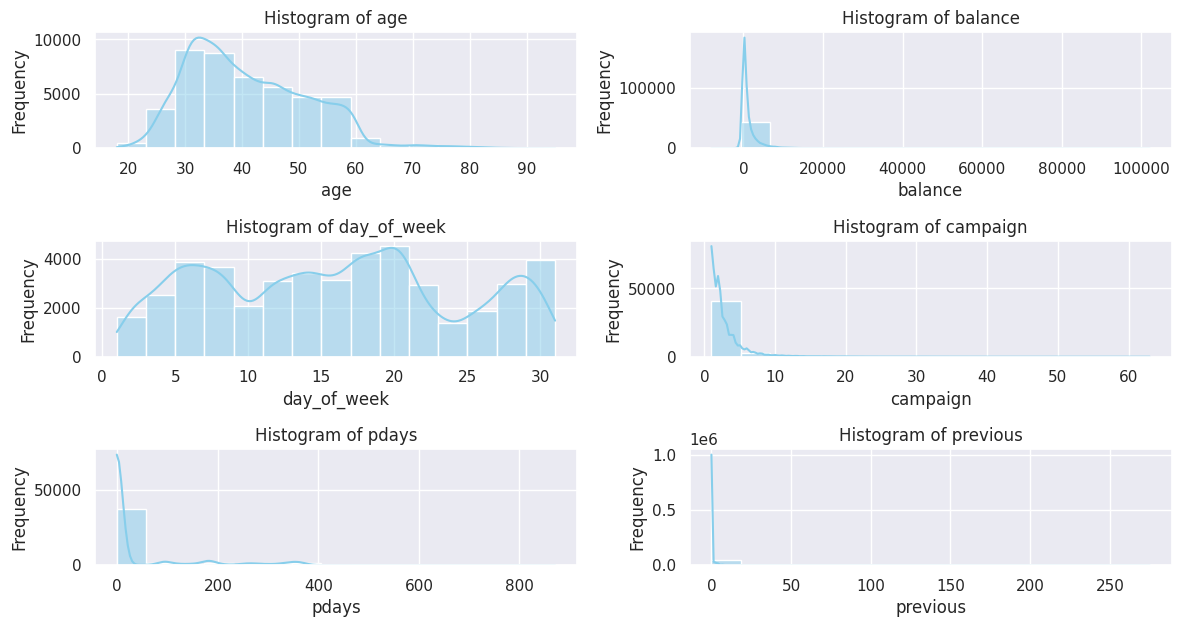

In [13]:
# Plot histograms
columns_to_plot = ['age', 'balance', 'day_of_week', 'campaign', 'pdays', 'previous']

plt.figure(figsize=(12, 8))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(4, 2, i)
    sns.histplot(df[column], bins=15, kde=True, color='skyblue')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

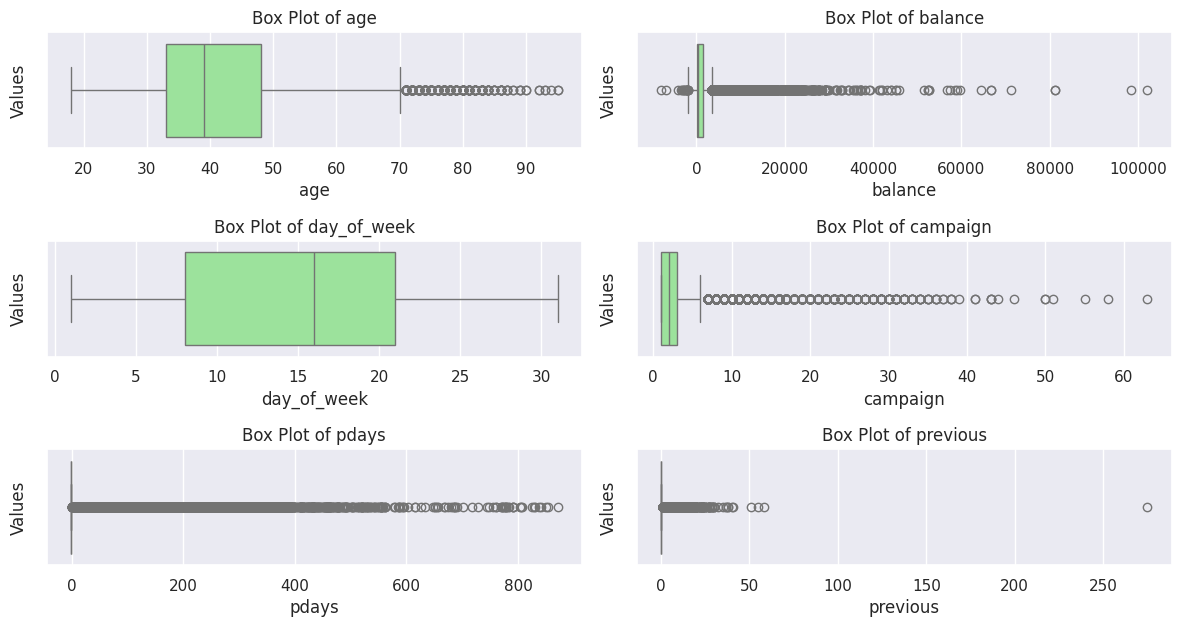

In [14]:
# Draw box plots to check for outliers
plt.figure(figsize=(12, 8))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(4, 2, i)  # 2 rows, 2 columns
    sns.boxplot(x=df[column], color='lightgreen')
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Values')

plt.tight_layout()

plt.show()

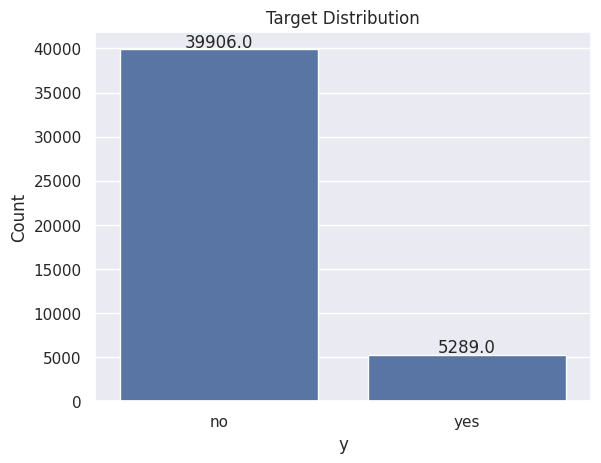

In [15]:
# Check the distribution of classes in the dataset
sns.countplot(x='y', data=df)

# Set title and axis labels
plt.title('Target Distribution')
plt.xlabel('y')
plt.ylabel('Count')
ax = plt.gca()

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

In [16]:
# Stadardise all the numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [17]:
# Label encoding for binary columns ('default', 'housing', 'loan', 'y')
label_columns = ['default', 'housing', 'loan', 'y']
le = LabelEncoder()
for col in label_columns:
    df[col] = le.fit_transform(df[col])

In [18]:
# One-Hot encoding for other categorical columns ('job', 'marital', 'education', etc.)
df = pd.get_dummies(df, columns=['job', 'marital', 'education', 'contact', 'month', 'poutcome'], drop_first=True)

In [19]:
# Correlation matrix
df.corr().style.background_gradient(cmap='coolwarm')


,age,default,balance,housing,loan,day_of_week,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
age,1.000000,-0.017900,0.097742,-0.185708,-0.015715,-0.009043,0.004770,-0.023816,0.001255,0.025111,-0.044033,0.021771,0.086641,-0.023365,0.447338,-0.008119,-0.065913,-0.197350,-0.068579,0.000390,0.050197,0.286136,-0.427734,-0.094208,-0.081355,0.069648,0.170341,-0.020203,0.074120,0.022866,-0.001230,-0.007490,0.002939,0.051729,0.019488,-0.127533,0.032740,0.060108,0.032408,-0.022998,0.035507,-0.000755
default,-0.017900,1.000000,-0.066769,-0.006056,0.077216,0.009451,0.016817,-0.030000,-0.018342,-0.022437,0.010332,0.026272,-0.000367,-0.002629,-0.011290,0.004098,0.000073,-0.016230,-0.003080,0.006462,-0.006673,-0.014485,0.003153,0.013191,-0.015209,-0.001246,-0.017221,0.019918,-0.007451,-0.009347,-0.009039,-0.006999,0.044271,0.007564,-0.013996,-0.002965,0.006114,-0.017460,-0.013959,-0.014455,-0.023353,0.039514
balance,0.097742,-0.066769,1.000000,-0.068882,-0.084425,0.004589,-0.014600,0.003370,0.016635,0.052784,-0.048799,0.009614,0.001635,0.067910,0.046921,0.017821,-0.038143,0.001210,-0.016153,0.008996,0.010772,0.025641,-0.012421,-0.070055,0.084143,0.011148,0.037959,-0.037393,0.008864,0.021584,-0.003577,-0.024450,-0.064403,0.029509,0.023181,-0.071194,0.117211,0.040179,0.021905,0.008433,0.035212,-0.030198
housing,-0.185708,-0.006056,-0.068882,1.000000,0.041237,-0.027786,-0.023583,0.124117,0.037029,-0.139283,0.177539,0.010562,-0.079433,-0.063320,-0.156635,-0.027366,0.070260,-0.085115,-0.012662,-0.048276,-0.075055,0.017541,-0.020271,0.101445,-0.099017,-0.047650,-0.080897,0.208249,-0.305235,-0.050581,-0.064591,-0.066501,-0.061389,-0.102401,-0.066320,0.427886,0.001084,-0.085485,-0.076383,0.039673,-0.091420,-0.063668
loan,-0.015715,0.077216,-0.084425,0.041237,1.000000,0.011456,0.009962,-0.022819,-0.011083,-0.068245,0.018260,0.039781,-0.017261,-0.038831,-0.014856,-0.007912,0.035602,-0.058528,0.014836,-0.035989,-0.031956,0.036843,-0.051616,0.070540,-0.045843,-0.050027,-0.013224,-0.007267,-0.069168,-0.020471,-0.008881,-0.004478,0.167820,-0.022807,-0.029778,-0.027932,0.019107,-0.030118,-0.033682,-0.009131,-0.053744,0.031482
day_of_week,-0.009043,0.009451,0.004589,-0.027786,0.011456,1.000000,0.162463,-0.092981,-0.051670,-0.028283,-0.022813,-0.002277,0.003988,0.018785,-0.010158,0.005099,-0.006393,-0.015868,0.032468,-0.006350,-0.011185,0.007291,-0.007666,-0.005607,0.021455,0.000153,0.023706,-0.034010,0.029625,-0.011356,-0.283320,0.250593,0.147408,-0.193768,-0.020732,-0.024965,0.096154,0.030543,-0.053876,-0.032917,-0.030289,0.086181
campaign,0.004770,0.016817,-0.014600,-0.023583,0.009962,0.162463,1.000000,-0.088656,-0.032870,-0.073196,0.008974,0.002120,0.003089,0.016624,-0.030875,0.005471,-0.004600,-0.021822,0.020785,-0.018457,0.014088,0.031393,-0.023131,-0.020883,0.012836,0.005695,0.053889,0.004881,0.150477,-0.012639,-0.030761,-0.063077,0.104226,0.043882,-0.018618,-0.067540,-0.084720,-0.051041,-0.036727,-0.020118,-0.057500,0.108000
pdays,-0.023816,-0.030000,0.003370,0.124117,-0.022819,-0.092981,-0.088656,1.000000,0.454802,0.103574,0.020034,-0.014231,-0.031375,-0.007792,-0.006308,-0.010384,0.005728,0.024466,-0.013449,-0.010436,-0.015378,-0.027675,0.028063,0.022015,-0.007465,-0.006937,0.015969,-0.247157,-0.107302,0.047228,0.070989,0.049484,-0.136293,-0.113535,0.031988,0.078984,0.007848,0.056797,0.084414,0.389776,0.228520,-0.869954
previous,0.001255,-0.018342,0.016635,0.037029,-0.011083,-0.051670,-0.032870,0.454802,1.000000,0.093207,-0.017117,-0.008197,-0.015219,0.019635,0.005825,-0.002388,-0.010918,0.023543,-0.001103,-0.008519,-0.009076,-0.012735,0

In [20]:
# Each feature's correlation with the target
correlation_matrix = df.corr()
target_correlations = correlation_matrix['y']

sorted_correlations = target_correlations.abs().sort_values(ascending=False)

correlation_table = pd.DataFrame({
    'Feature': sorted_correlations.index,
    'Correlation with Target': sorted_correlations.values
})

correlation_table = correlation_table[correlation_table['Feature'] != 'target']

print(correlation_table)

                Feature  Correlation with Target
0                     y                 1.000000
1      poutcome_success                 0.306773
2      poutcome_unknown                 0.167000
3       contact_unknown                 0.151003
4               housing                 0.139283
5             month_mar                 0.129446
6             month_oct                 0.128518
7             month_sep                 0.123174
8                 pdays                 0.103574
9             month_may                 0.102565
10             previous                 0.093207
11          job_retired                 0.079272
12          job_student                 0.076880
13            month_dec                 0.075157
14             campaign                 0.073196
15      job_blue-collar                 0.072122
16                 loan                 0.068245
17   education_tertiary                 0.066563
18       marital_single                 0.063645
19      marital_marr

### Data splitting

In [21]:
# Separate the features and target
X = df.drop(columns=['y'])  # All columns except 'y'
y = df['y']

In [22]:
# Random splitting of data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Stratified splitting of data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [24]:
# Get the training data to use with oversampling/ under-sampling
train_df = pd.concat([X_train, y_train], axis=1)

In [25]:
# #create two different dataframe of majority and minority class
# df_majority = train_df[train_df['y'] == 0]
# df_minority = train_df[train_df['y'] == 1]
# # upsample minority class
# df_minority_upsampled = resample(df_minority,
#                                  replace=True,
#                                  n_samples= df_majority.shape[0],
#                                  random_state=42)
# # Combine majority class with upsampled minority class
# df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [26]:
df_majority = train_df[train_df['y'] == 0]
df_minority =train_df[train_df['y'] == 1]

# Undersample majority class
df_majority_undersampled = resample(df_majority,
                                     replace=False,  # sample without replacement
                                     n_samples=len(df_minority),  # to match minority class
                                     random_state=42)  # reproducible results

# Combine minority class with undersampled majority class
df_undersampled = pd.concat([df_majority_undersampled, df_minority])

In [27]:
X_train_undersampled = df_undersampled.drop(columns=['y'])  # All columns except 'y'
y_train_undersampled = df_undersampled['y']

In [28]:
# X_train_upsampled = df_upsampled.drop(columns=['y'])
# y_train_upsampled = df_upsampled['y']

### Random Forest Model

In [29]:
model = RandomForestClassifier(random_state=42)
# model.fit(X_train_upsampled, y_train_upsampled)
model.fit(X_train_undersampled, y_train_undersampled)
# model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [30]:
# # Hyperparameters for GridSearchCV
# param_grid = {
#     'n_estimators': [50, 100, 200],  # Number of trees in the forest
#     'max_depth': [10, 20, None],      # Maximum depth of the trees
#     'min_samples_split': [2, 5],      # Minimum samples required to split an internal node
#     'min_samples_leaf': [1, 2],       # Minimum samples required to be at a leaf node
#     'bootstrap': [True, False]        # Whether bootstrap samples are used when building trees
# }

# # Set up GridSearchCV
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
#                            cv=5, scoring='f1', n_jobs=-1, verbose=2)

# # Fit GridSearchCV on the training data
# grid_search.fit(X_train, y_train)

# # Get the best parameters and best score
# print("Best parameters found: ", grid_search.best_params_)
# print("Best F1 score found: ", grid_search.best_score_)

In [31]:
# # Evaluate the best model on the test set
# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(X_test)
# test_accuracy = best_model.score(X_test, y_test)
# print(f"Test accuracy: {test_accuracy * 100:.2f}%")
# print("Classification Report:\n", classification_report(y_test, y_pred))

In [32]:
# Evaluation metrics
y_pred = model.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

recall = recall_score(y_test, y_pred)
print("Recall:", recall)

f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

print(classification_report(y_test, y_pred))

auc = roc_auc_score(y_test, y_pred)
print(f"ROC AUC Score: {auc}")

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
print(cm)

Accuracy: 0.7634694103330014
Precision: 0.29254683140693505
Recall: 0.6690975387420237
F1-score: 0.4070992789794787
              precision    recall  f1-score   support

           0       0.94      0.78      0.85      7942
           1       0.29      0.67      0.41      1097

    accuracy                           0.76      9039
   macro avg       0.62      0.72      0.63      9039
weighted avg       0.87      0.76      0.80      9039

ROC AUC Score: 0.7228010987590753
[[6167 1775]
 [ 363  734]]


In [33]:
# 5 fold cross validation
f1_scores = cross_val_score(model, X, y, cv=5, scoring='f1')

# F1 score for each fold
print(f"F1 Scores for each fold: {f1_scores}")

# Average F1 score
print(f"Mean F1 Score: {np.mean(f1_scores)}")

F1 Scores for each fold: [0.         0.0036245  0.01326372 0.04427002 0.19053834]
Mean F1 Score: 0.05033931513805344


### Neural Network Model

In [34]:
# Initialize a Multi-layer Perceptron classifier.
mlp = MLPClassifier(hidden_layer_sizes=(100),max_iter=10, random_state=25,shuffle=True)

# Train the classifier.
mlp.fit(X_train_undersampled, y_train_undersampled)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=100, max_iter=10, random_state=25)

In [35]:
# # Define the parameter grid
# param_grid = {
#     'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
#     'activation': ['relu', 'tanh'],
#     'solver': ['adam', 'sgd'],
#     'learning_rate_init': [0.001, 0.01, 0.1],
# }

In [36]:
# grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=5, n_jobs=-1)

# # Fit the model
# grid_search.fit(X_train, y_train)

# # Display the best hyperparameters found
# print("Best parameters found: ", grid_search.best_params_)

In [37]:
# # Evaluate the best model on the test set
# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(X_test)
# test_accuracy = best_model.score(X_test, y_test)
# print(f"Test accuracy: {test_accuracy * 100:.2f}%")
# print("Classification Report:\n", classification_report(y_test, y_pred))

In [38]:
# Evaluation metrics
y_pred = mlp.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

recall = recall_score(y_test, y_pred)
print("Recall:", recall)

f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

print(classification_report(y_test, y_pred))

auc = roc_auc_score(y_test, y_pred)
print(f"ROC AUC Score: {auc}")

cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy: 0.7948888151344176
Precision: 0.31915910176779744
Recall: 0.6089334548769371
F1-score: 0.4188087774294671
              precision    recall  f1-score   support

           0       0.94      0.82      0.88      7942
           1       0.32      0.61      0.42      1097

    accuracy                           0.79      9039
   macro avg       0.63      0.71      0.65      9039
weighted avg       0.86      0.79      0.82      9039

ROC AUC Score: 0.7147538087781814
[[6517 1425]
 [ 429  668]]


In [39]:
# Make predictions.
f1_scores = cross_val_score(mlp, X, y, cv=5, scoring='f1')

# Print the F1 score for each fold
print(f"F1 Scores for each fold: {f1_scores}")
print(f"Mean F1 Score: {np.mean(f1_scores)}")

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


F1 Scores for each fold: [0.         0.00402267 0.02181271 0.08576329 0.18559746]
Mean F1 Score: 0.059439226761466714


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
